In [ ]:
#Instalamos librería para análisis de variables categóricas
%pip install funpymodeling

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from funpymodeling.exploratory import freq_tbl 

In [3]:
#Carga desde un archivo .xlsx sin indice
Micro_Retailer= pd.read_excel('microretailer_mit_lift_lab.xlsx') 

In [4]:
#Verificamos información del DataFrame
Micro_Retailer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Columns: 106 entries, _record_id to 235_email
dtypes: float64(23), int64(2), object(81)
memory usage: 141.7+ KB


In [5]:
#Imprimo los primeros 5 registro del dataframe
Micro_Retailer.head()

,_record_id,_title,_server_updated_at,_updated_by,_geometry,_latitude,_longitude,228_store_name,229_store_picture,232_type_of_store,...,261_technology_organization,262_technology_serve_customers,263_technology_secure_sales,264_technology_budget,267_technology_investment_customer_preferences,234_willingness_participate_workshop,318_shopkeeper_name,319_shopkeepers_last_name,236_whatsapp,235_email
0,dff2998e-af74-4de6-8efd-488aca24e67b,"November 12, 2022",2022-11-12 22:15:10 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.233822273 19.0535362706),19.053536,-98.233822,Eugene’s Compostura,1 Photo,Tailor,...,NaN,NaN,NaN,NaN,NaN,no,NaN,NaN,NaN,NaN
1,c596412f-4fc2-4983-acba-d9565859e42f,"November 12, 2022",2022-11-12 22:15:09 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.2341421351 19.0535610353),19.053561,-98.234142,Frutas y verduras Angy,1 Photo,Grocery store (aka. nanostore),...,NaN,NaN,NaN,NaN,NaN,no,NaN,NaN,NaN,NaN
2,5bb632b3-41b5-4fb6-a817-b564e8b45a48,"November 12, 2022",2022-11-12 22:15:09 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.232299887 19.058654656),19.058655,-98.232300,Libélula,1 Photo,Grocery store (aka. nanostore),...,NaN,NaN,NaN,NaN,NaN,no,NaN,NaN,NaN,NaN
3,6774a0f6-bab4-4a58-bf94-95ad0b7cb438,"November 12, 2022",2022-11-12 22:15:09 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.2331576513 19.0592929035),19.059293,-98.233158,Quality fix,1 Photo,Grocery store (aka. nanostore),...,NaN,NaN,NaN,NaN,NaN,no,NaN,NaN,NaN,NaN
4,6cc637fa-3d54-48c7-9499-6de13d0a26aa,"November 12, 2022",2022-11-12 22:15:08 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.2338639604 19.0595846029),19.059585,-98.233864,Artesanías Los Pinos,1 Photo,Grocery store (aka. nanostore),...,NaN,NaN,NaN,NaN,NaN,no,NaN,NaN,NaN,NaN


In [6]:
#Saco las variables de analisis
df=Micro_Retailer.loc[ : , ["49_inventory_records","18_sales_records","210_sales_channels", "189_payment_methods", "214_customer_relationship_tools", "69_why_not_services", "312_payment_of_utilities","313_home_deliveries", "46_willingness_reorder_suppliers_variety", "47_willingness_reorder_suppliers_lower_prices", "185_place_orders_suppliers", "192_procurement_planning_tools", "277_payment_method_suppliers", "279_changes_procurement_pandemic", "157_frequency_organize_shelves", "161_actions_stockouts", "249_technology_training", "250_technology_investment_operations", "251_technology_investment_customers", "267_technology_investment_customer_preferences",   ]]
df

,49_inventory_records,18_sales_records,210_sales_channels,189_payment_methods,214_customer_relationship_tools,69_why_not_services,312_payment_of_utilities,313_home_deliveries,46_willingness_reorder_suppliers_variety,47_willingness_reorder_suppliers_lower_prices,185_place_orders_suppliers,192_procurement_planning_tools,277_payment_method_suppliers,279_changes_procurement_pandemic,157_frequency_organize_shelves,161_actions_stockouts,249_technology_training,250_technology_investment_operations,251_technology_investment_customers,267_technology_investment_customer_preferences
0,Software especializado + computadora,Software especializado + computadora,"Llamada a Teléfono celular,Llamada a Teléfono ...","Efectivo,Transferencia interbancaria",Redes sociales,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Semestralmente,Solicitar tiempo al cliente para conseguir el ...,NaN,NaN,NaN,NaN
1,No lo hago,No lo hago,WhatsApp,"Efectivo,Transferencia interbancaria",Aplicación móvil,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Transferencia interbancaria,NaN,NaN,"Ofrecer un producto sustituto,Solicitar tiempo...",NaN,NaN,NaN,NaN
2,En Excel,Software especializado + computadora,"Redes sociales (e.g. Facebook, Instagram),What...","Efectivo,Tarjeta de débito y/o crédito",Redes sociales,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Semanalmente,Perder la venta,NaN,NaN,NaN,NaN
3,Software especializado + computadora,Software especializado + computadora,Llamada a Teléfono fijo,"Efectivo,Tarjeta de débito y/o crédito,Transfe...",Teléfono,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Semanalmente,Ofrecer un producto sustituto,NaN,NaN,NaN,NaN
4,En papel,En papel,Llamada a Teléfono celular,"Efectivo,Tarjeta de débito y/o crédito,Transfe...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mensualmente,"Informar al proveedor,Solicitar tiempo al clie...",NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
168,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
169,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
#Corroboramos valores nulos
valores_nulos=df.isnull().sum()
valores_nulos

49_inventory_records                               61
18_sales_records                                   61
210_sales_channels                                 89
189_payment_methods                                64
214_customer_relationship_tools                    76
69_why_not_services                               130
312_payment_of_utilities                          105
313_home_deliveries                               113
46_willingness_reorder_suppliers_variety           97
47_willingness_reorder_suppliers_lower_prices     102
185_place_orders_suppliers                        100
192_procurement_planning_tools                    103
277_payment_method_suppliers                      103
279_changes_procurement_pandemic                  148
157_frequency_organize_shelves                     75
161_actions_stockouts                              79
249_technology_training                            98
250_technology_investment_operations               97
251_technology_investment_cu

MÉTODO PARA REEMPRAZAR VALORES NULOS

In [8]:
#Ya que todas las variables son cualitativas, se sustituyen los datos nulos por la palabra "DESCONOCIDO"
df = df.fillna("DESCONOCIDO")
df

,49_inventory_records,18_sales_records,210_sales_channels,189_payment_methods,214_customer_relationship_tools,69_why_not_services,312_payment_of_utilities,313_home_deliveries,46_willingness_reorder_suppliers_variety,47_willingness_reorder_suppliers_lower_prices,185_place_orders_suppliers,192_procurement_planning_tools,277_payment_method_suppliers,279_changes_procurement_pandemic,157_frequency_organize_shelves,161_actions_stockouts,249_technology_training,250_technology_investment_operations,251_technology_investment_customers,267_technology_investment_customer_preferences
0,Software especializado + computadora,Software especializado + computadora,"Llamada a Teléfono celular,Llamada a Teléfono ...","Efectivo,Transferencia interbancaria",Redes sociales,DESCONOCIDO,DESCONOCIDO,DESCONOCIDO,DESCONOCIDO,DESCONOCIDO,DESCONOCIDO,DESCONOCIDO,DESCONOCIDO,DESCONOCIDO,Semestralmente,Solicitar tiempo al cliente para conseguir el ...,DESCONOCIDO,DESCONOCIDO,DESCONOCIDO,DESCONOCIDO
1,No lo hago,No lo hago,WhatsApp,"Efectivo,Transferencia interbancaria",Aplicación móvil,DESCONOCIDO,DESCONOCIDO,DESCONOCIDO,DESCONOCIDO,DESCONOCIDO,DESCONOCIDO,DESCONOCIDO,Transferencia interbancaria,DESCONOCIDO,DESCONOCIDO,"Ofrecer un producto sustituto,Solicitar tiempo...",DESCONOCIDO,DESCONOCIDO,DESCONOCIDO,DESCONOCIDO
2,En Excel,Software especializado + computadora,"Redes sociales (e.g. Facebook, Instagram),What...","Efectivo,Tarjeta de débito y/o crédito",Redes sociales,DESCONOCIDO,DESCONOCIDO,DESCONOCIDO,DESCONOCIDO,DESCONOCIDO,DESCONOCIDO,DESCONOCIDO,DESCONOCIDO,DESCONOCIDO,Semanalmente,Perder la venta,DESCONOCIDO,DESCONOCIDO,DESCONOCIDO,DESCONOCIDO
3,Software especializado + computadora,Software especializado + computadora,Llamada a Teléfono fijo,"Efectivo,Tarjeta de débito y/o crédito,Transfe...",Teléfono,DESCONOCIDO,DESCONOCIDO,DESCONOCIDO,DESCONOCIDO,DESCONOCIDO,DESCONOCIDO,DESCONOCIDO,DESCONOCIDO,DESCONOCIDO,Semanalmente,Ofrecer un producto sustituto,DESCONOCIDO,DESCONOCIDO,DESCONOCIDO,DESCONOCIDO
4,En papel,En papel,Llamada a Teléfono celular,"Efectivo,Tarjeta de débito y/o crédito,Transfe...",DESCONOCIDO,DESCONOCIDO,DESCONOCIDO,DESCONOCIDO,DESCONOCIDO,DESCONOCIDO,DESCONOCIDO,DESCONOCIDO,DESCONOCIDO,DESCONOCIDO,Mensualmente,"Informar al proveedor,Solicitar tiempo al clie...",DESCONOCIDO,DESCONOCIDO,DESCONOCIDO,DESCONOCIDO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,DESCONOCIDO,DESCONOCIDO,DESCONOCIDO,DESCONOCIDO,DESCONOCIDO,DESCONOCIDO,DESCONOCIDO,DESCONOCIDO,DESCONOCIDO,DESCONOCIDO,DESCONOCIDO,DESCONOCIDO,DESCONOCIDO,DESCONOCIDO,DESCONOCIDO,DESCONOCIDO,DESCONOCIDO,DESCONOCIDO,DESCONOCIDO,DESCONOCIDO
167,DESCONOCIDO,DESCONOCIDO,DESCONOCIDO,DESCONOCIDO,DESCONOCIDO,DESCONOCIDO,DESCONOCIDO,DESCONOCIDO,DESCONOCIDO,DESCONOCIDO,DESCONOCIDO,DESCONOCIDO,DESCONOCIDO,DESCONOCIDO,DESCONOCIDO,DESCONOCIDO,DESCONOCIDO,DESCONOCIDO,DESCONOCIDO,DESCONOCIDO
168,DESCONOCIDO,DESCONOCIDO,DESCONOCIDO,DESCONOCIDO,DESCONOCIDO,DESCONOCIDO,DESCONOCIDO,DESCONOCIDO,DESCONOCIDO,DESCONOCIDO,DESCONOCIDO,DESCONOCIDO,DESCONOCIDO,DESCONOCIDO,DESCONOCIDO,DESCONOCIDO,DESCONOCIDO,DESCONOCIDO,DESCONOCIDO,DESCONOCIDO
169,DESCONOCIDO,DESCONOCIDO,DESCONOCIDO,DESCONOCIDO,DESCONOCIDO,DESCONOCIDO,DESCONOCIDO,DESCONOCIDO,DESCONOCIDO,DESCONOCIDO,DESCONOCIDO,DESCONOCIDO,DESCONOCIDO,DESCONOCIDO,DESCONOCIDO,DESCONOCIDO,DESCONOCIDO,DESCONOCIDO,DESCONOCIDO,DESCONOCIDO


In [9]:
#Corroboramos datos nulos
valores_nulos=df.isnull().sum()
valores_nulos

49_inventory_records                              0
18_sales_records                                  0
210_sales_channels                                0
189_payment_methods                               0
214_customer_relationship_tools                   0
69_why_not_services                               0
312_payment_of_utilities                          0
313_home_deliveries                               0
46_willingness_reorder_suppliers_variety          0
47_willingness_reorder_suppliers_lower_prices     0
185_place_orders_suppliers                        0
192_procurement_planning_tools                    0
277_payment_method_suppliers                      0
279_changes_procurement_pandemic                  0
157_frequency_organize_shelves                    0
161_actions_stockouts                             0
249_technology_training                           0
250_technology_investment_operations              0
251_technology_investment_customers               0
267_technolo

##ANÁLISIS UNIVARIADO

In [ ]:
#49_inventory_records
#18_sales_records

In [10]:
#49_inventory_records
#Obtengo un análisis univariado de una variable categórica en específico
inventory_records= freq_tbl(df['49_inventory_records'])
inventory_records

,49_inventory_records,frequency,percentage,cumulative_perc
0,DESCONOCIDO,61,0.356725,0.356725
1,En papel,40,0.233918,0.590643
2,Software especializado + computadora,21,0.122807,0.713450
3,En Excel,20,0.116959,0.830409
4,No lo hago,18,0.105263,0.935673
5,"En Excel,En papel",7,0.040936,0.976608
6,Mentalmente,1,0.005848,0.982456
7,Aplicación móvil (i.e. App) + smartphone,1,0.005848,0.988304
8,"En papel,Mental",1,0.005848,0.994152
9,"Aplicación móvil (i.e. App) + smartphone,En Excel",1,0.005848,1.000000


In [11]:
#18_sales_records
#Obtengo un análisis univariado de una variable categórica en específico
sales_records= freq_tbl(df['18_sales_records'])
sales_records

,18_sales_records,frequency,percentage,cumulative_perc
0,DESCONOCIDO,61,0.356725,0.356725
1,En papel,47,0.274854,0.631579
2,Software especializado + computadora,22,0.128655,0.760234
3,No lo hago,14,0.081871,0.842105
4,En Excel,10,0.058480,0.900585
5,Caja registradora (análoga),4,0.023392,0.923977
6,"En Excel,En papel",4,0.023392,0.947368
7,Aplicación móvil (i.e. App) + smartphone,1,0.005848,0.953216
8,"Aplicación móvil (i.e. App) + smartphone,Caja ...",1,0.005848,0.959064
9,Contadora,1,0.005848,0.964912


PROVEEDORES

In [ ]:
#46_willingness_reorder_suppliers_variety
#47_willingness_reorder_suppliers_lower_prices
#185_place_orders_suppliers
#192_procurement_planning_tools
#277_payment_method_suppliers

Text(0, 0.5, 'Frecuencia')

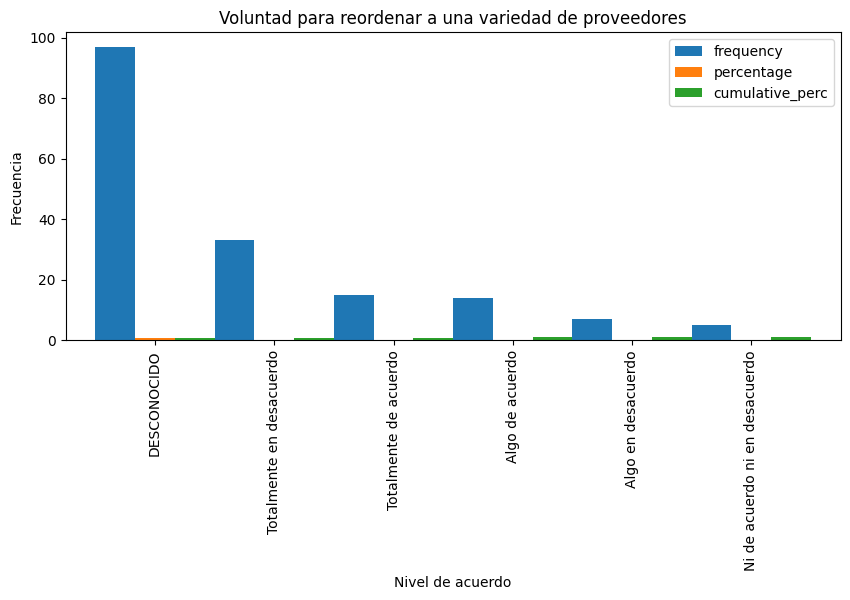

In [12]:
#46_willingness_reorder_suppliers_variety
willingness_reorder_suppliers_variety=freq_tbl(df['46_willingness_reorder_suppliers_variety'])
Filtro_willingness_reorder_suppliers_variety= willingness_reorder_suppliers_variety.set_index('46_willingness_reorder_suppliers_variety')
Filtro_willingness_reorder_suppliers_variety.plot(kind = 'bar', width=1, figsize=(10,4))
plt.title('Voluntad para reordenar a una variedad de proveedores')
plt.xlabel('Nivel de acuerdo')
plt.ylabel('Frecuencia')

Text(0, 0.5, 'Frecuencia')

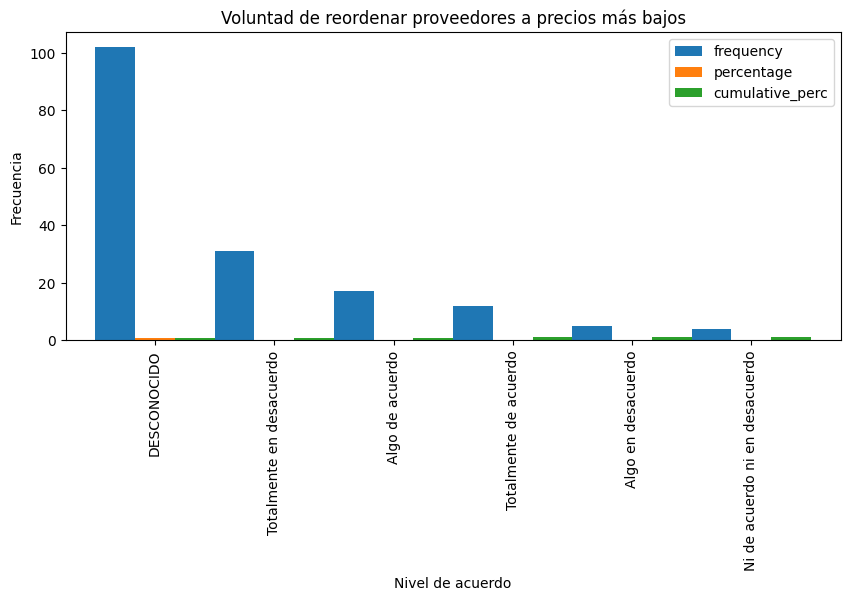

In [13]:
#47_willingness_reorder_suppliers_lower_prices
willingness_reorder_suppliers_lower_prices=freq_tbl(df['47_willingness_reorder_suppliers_lower_prices'])
Filtro_willingness_reorder_suppliers_lower_prices= willingness_reorder_suppliers_lower_prices.set_index('47_willingness_reorder_suppliers_lower_prices')
Filtro_willingness_reorder_suppliers_lower_prices.plot(kind = 'bar', width=1, figsize=(10,4))
plt.title('Voluntad de reordenar proveedores a precios más bajos')
plt.xlabel('Nivel de acuerdo')
plt.ylabel('Frecuencia')

Text(0.5, 1.0, 'Cómo realizan sus pedidos a los proveedores')

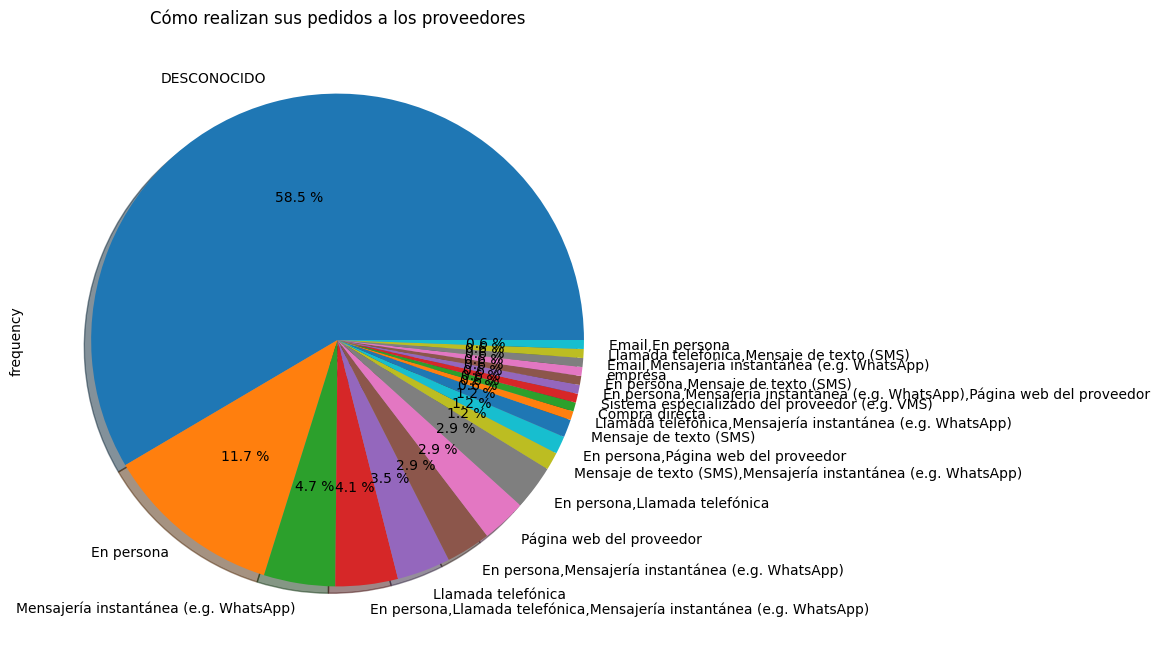

In [14]:
#185_place_orders_suppliers
place_orders_suppliers=freq_tbl(df['185_place_orders_suppliers'])
Filtro_place_orders_suppliers= place_orders_suppliers.set_index('185_place_orders_suppliers')
Filtro_place_orders_suppliers["frequency"].plot(kind='pie', figsize=(10,8), shadow=True, autopct="%0.1f %%")
plt.title('Cómo realizan sus pedidos a los proveedores')

Text(0.5, 1.0, 'Que herramientas de planeación de pedidos utilizan')

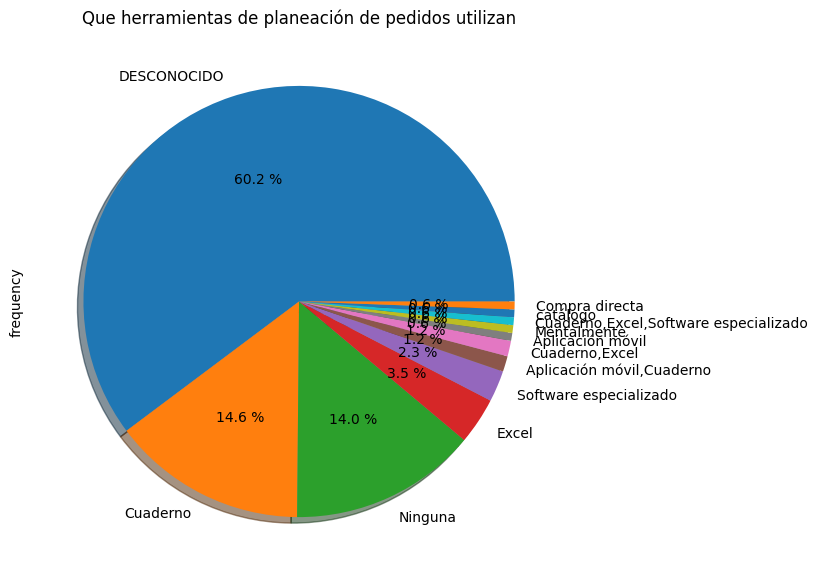

In [15]:
#192_procurement_planning_tools
procurement_planning_tools=freq_tbl(df['192_procurement_planning_tools'])
Filtro_procurement_planning_tools= procurement_planning_tools.set_index('192_procurement_planning_tools')
Filtro_procurement_planning_tools["frequency"].plot(kind='pie', figsize=(10,7), shadow=True, autopct="%0.1f %%")
plt.title('Que herramientas de planeación de pedidos utilizan')

Text(0.5, 1.0, 'Métodos de pago a provedoores')

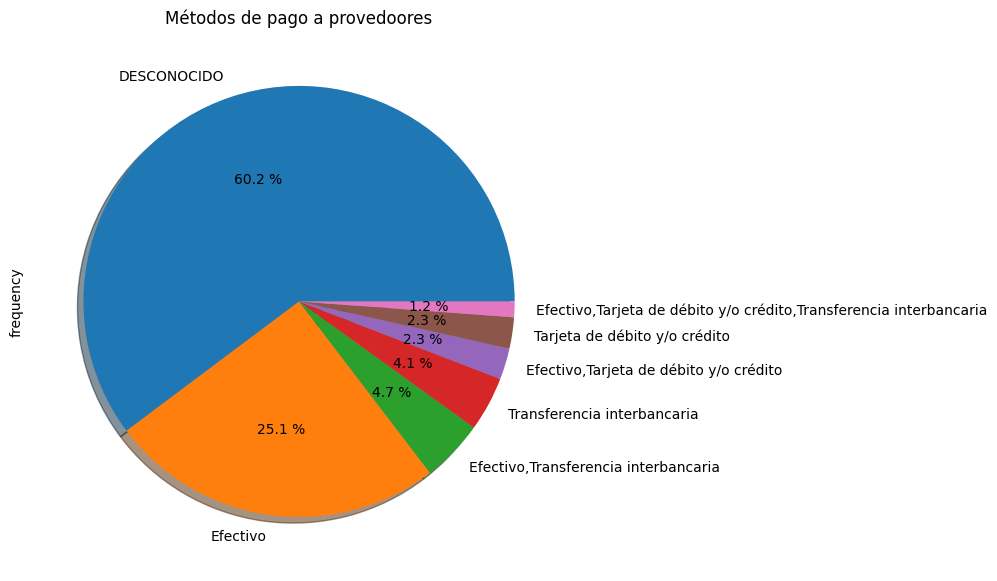

In [16]:
#277_payment_method_suppliers
payment_method_suppliers=freq_tbl(df['277_payment_method_suppliers'])
Filtro_payment_method_suppliers= payment_method_suppliers.set_index('277_payment_method_suppliers')
Filtro_payment_method_suppliers["frequency"].plot(kind='pie', figsize=(10,7), shadow=True, autopct="%0.1f %%")
plt.title('Métodos de pago a provedoores')

TECNOLOGÍA

In [ ]:
#249_technology_training
#250_technology_investment_operations
#251_technology_investment_customers
#267_technology_investment_customer_preferences

Text(0.5, 1.0, 'Dispocisión a tener una formación tecnológica')

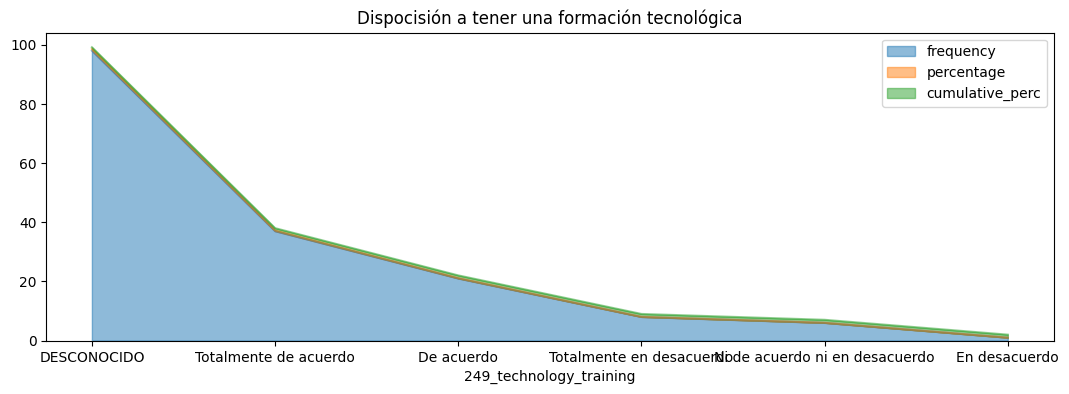

In [18]:
#249_technology_training
technology_training=freq_tbl(df['249_technology_training'])
Filtro_technology_training= technology_training.set_index('249_technology_training')
Filtro_technology_training.plot(kind='area', figsize=(13,4),alpha = 0.5)
plt.title('Dispocisión a tener una formación tecnológica')

Text(0, 0.5, 'Frecuencia')

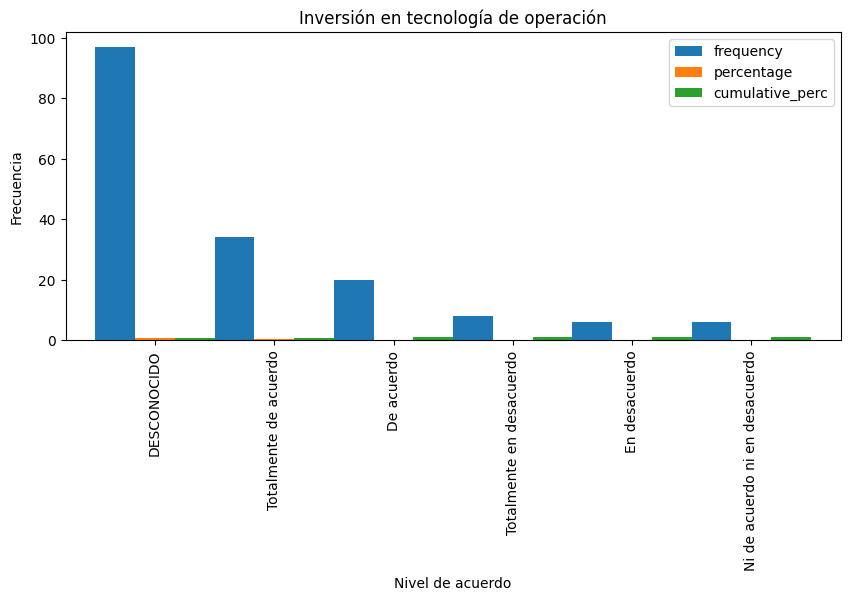

In [19]:
#250_technology_investment_operations
technology_investment_operations=freq_tbl(df['250_technology_investment_operations'])
Filtro_technology_investment_operations= technology_investment_operations.set_index('250_technology_investment_operations')
Filtro_technology_investment_operations.plot(kind = 'bar', width=1, figsize=(10,4))
plt.title('Inversión en tecnología de operación')
plt.xlabel('Nivel de acuerdo')
plt.ylabel('Frecuencia')

Text(0, 0.5, 'Frecuencia')

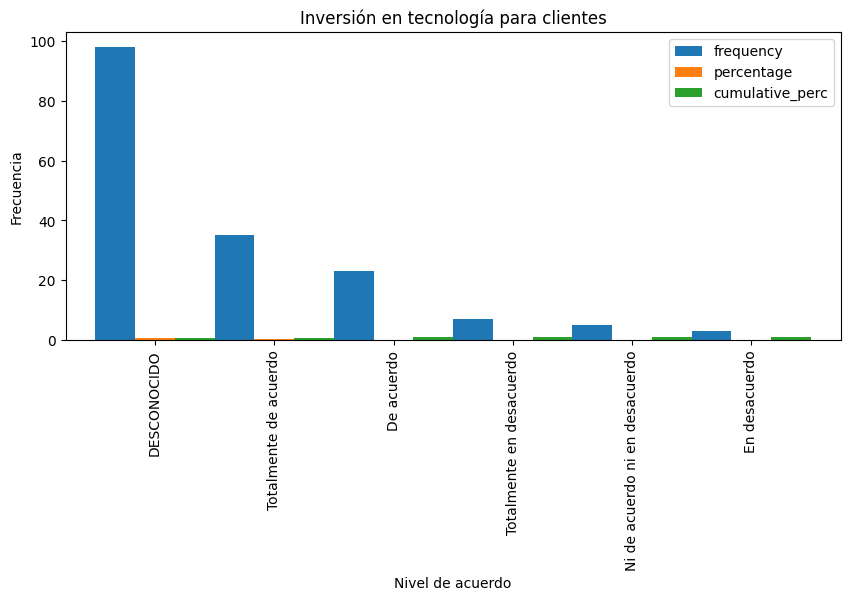

In [20]:
#251_technology_investment_customers
technology_investment_customers=freq_tbl(df['251_technology_investment_customers'])
Filtro_technology_investment_customers= technology_investment_customers.set_index('251_technology_investment_customers')
Filtro_technology_investment_customers.plot(kind = 'bar', width=1, figsize=(10,4))
plt.title('Inversión en tecnología para clientes')
plt.xlabel('Nivel de acuerdo')
plt.ylabel('Frecuencia')

Text(0, 0.5, 'Frecuencia')

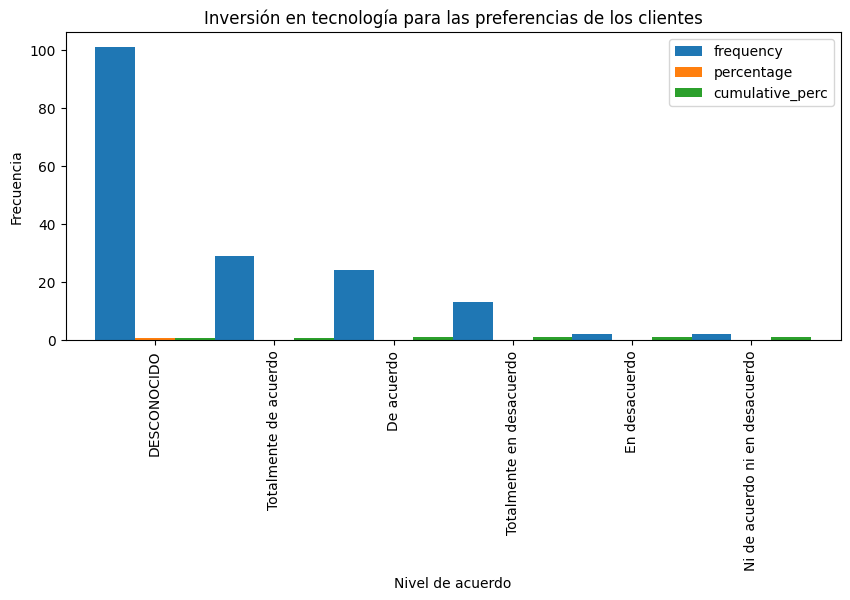

In [21]:
#267_technology_investment_customer_preferences
technology_investment_customer_preferences=freq_tbl(df['267_technology_investment_customer_preferences'])
Filtro_technology_investment_customer_preferences= technology_investment_customer_preferences.set_index('267_technology_investment_customer_preferences')
Filtro_technology_investment_customer_preferences.plot(kind = 'bar', width=1, figsize=(10,4))
plt.title('Inversión en tecnología para las preferencias de los clientes')
plt.xlabel('Nivel de acuerdo')
plt.ylabel('Frecuencia')

ESTANTERÍA

In [ ]:
#157_frequency_organize_shelves
#161_actions_stockouts

Text(0.5, 1.0, 'Frecuencia de organización de estantes')

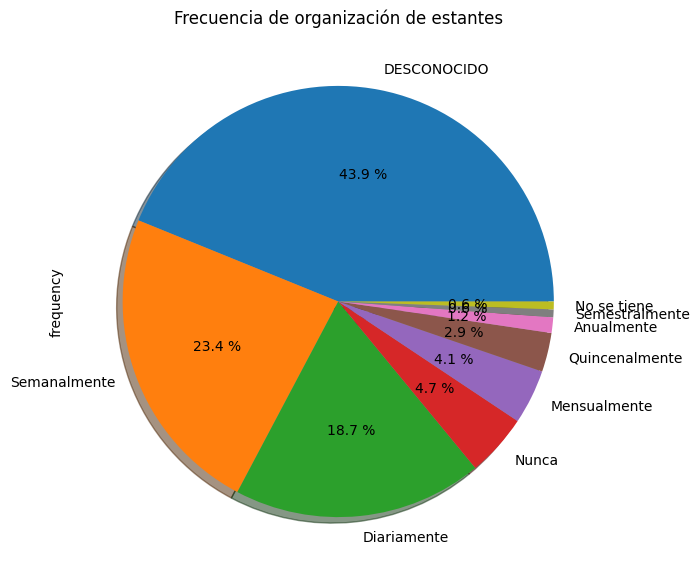

In [22]:
#157_frequency_organize_shelves
frequency_organize_shelves=freq_tbl(df['157_frequency_organize_shelves'])
Filtro_frequency_organize_shelves= frequency_organize_shelves.set_index('157_frequency_organize_shelves')
Filtro_frequency_organize_shelves["frequency"].plot(kind='pie', figsize=(10,7), shadow=True, autopct="%0.1f %%")
plt.title('Frecuencia de organización de estantes')

Text(0.5, 1.0, 'Acciones en caso de agotarse un producto')

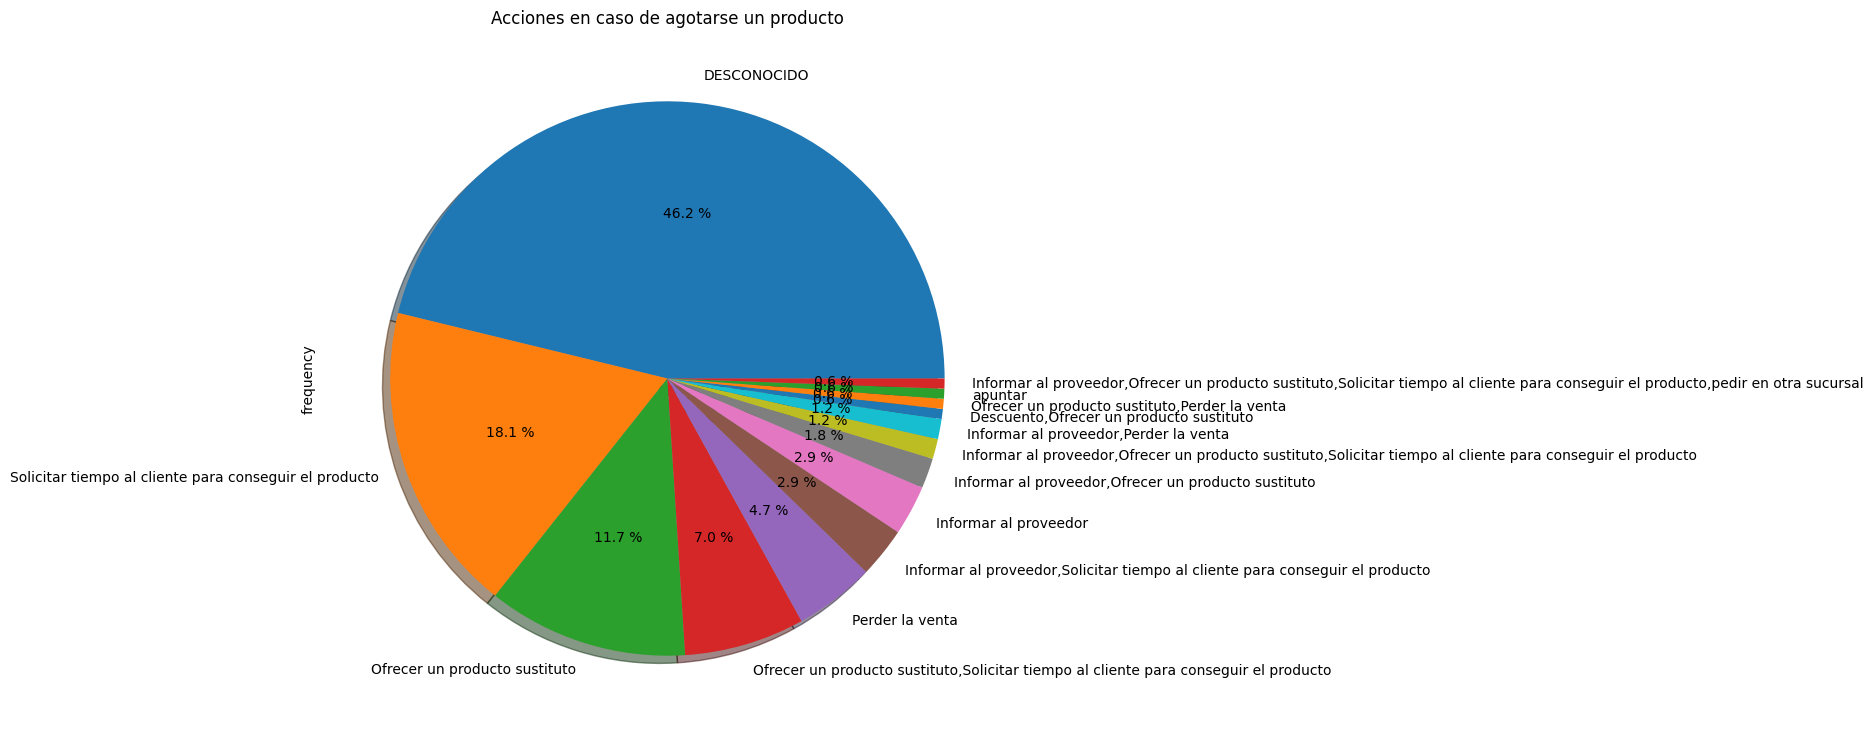

In [23]:
#161_actions_stockouts
actions_stockouts=freq_tbl(df['161_actions_stockouts'])
Filtro_actions_stockouts= actions_stockouts.set_index('161_actions_stockouts')
Filtro_actions_stockouts["frequency"].plot(kind='pie', figsize=(10,9), shadow=True, autopct="%0.1f %%")
plt.title('Acciones en caso de agotarse un producto')

VENTAS

In [ ]:
#210_sales_channels
#189_payment_methods

Text(0.5, 1.0, 'Canales de venta')

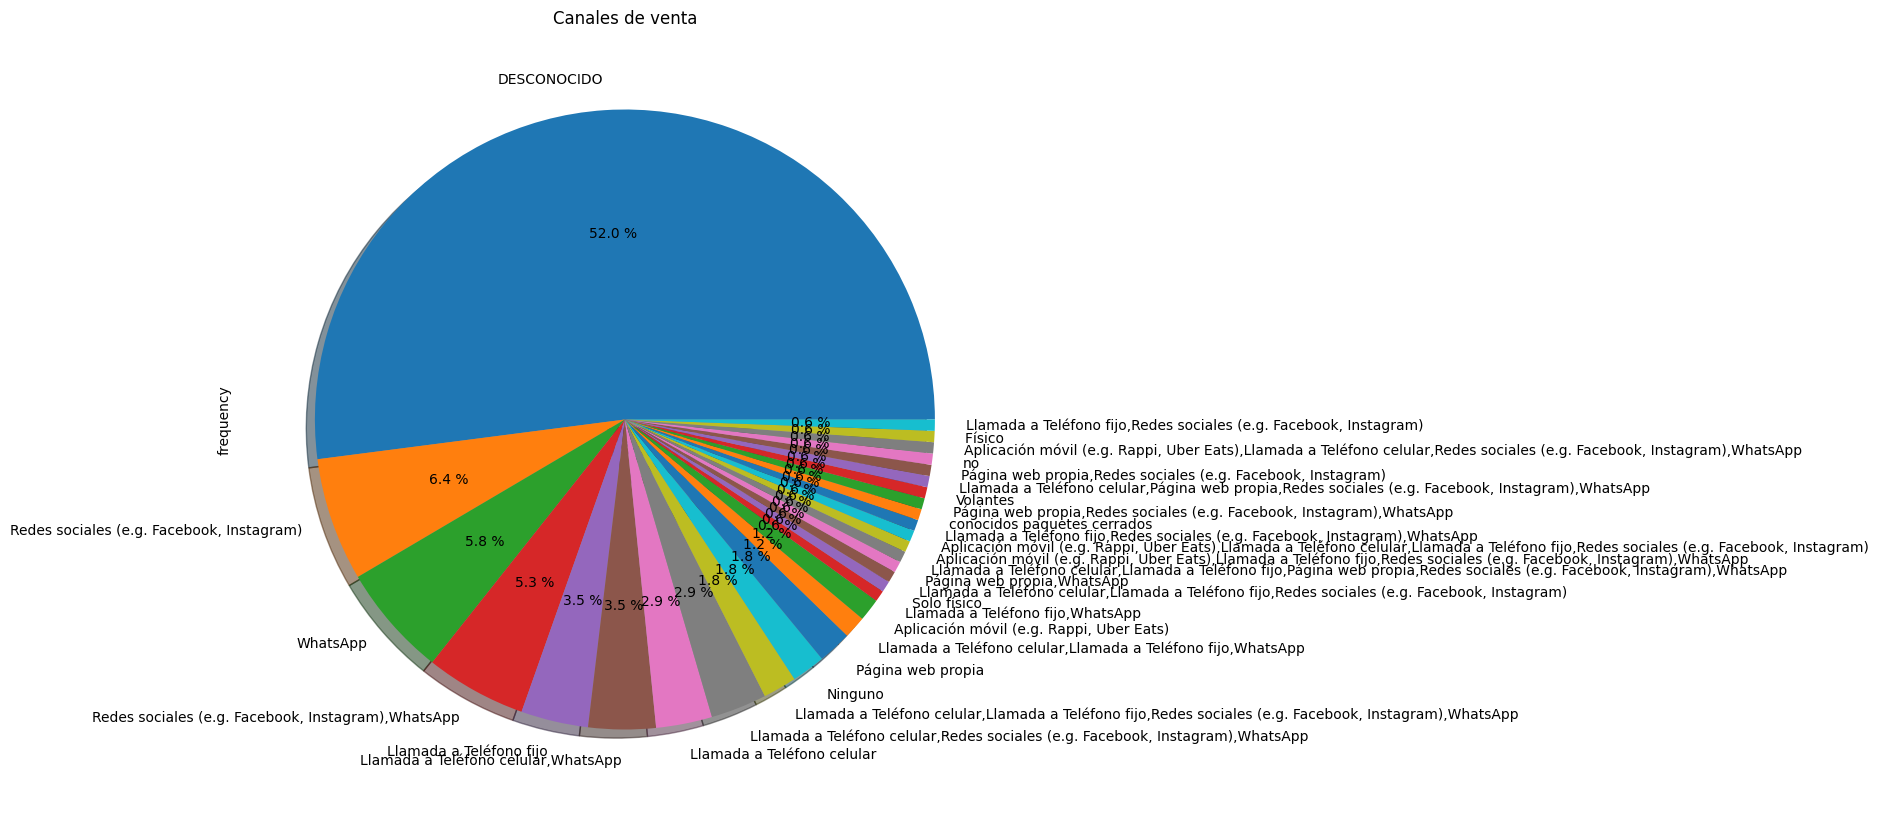

In [24]:
#210_sales_channels
sales_channels=freq_tbl(df['210_sales_channels'])
Filtro_sales_channels= sales_channels.set_index('210_sales_channels')
Filtro_sales_channels["frequency"].plot(kind='pie', figsize=(10,15), shadow=True, autopct="%0.1f %%")
plt.title('Canales de venta')

Text(0, 0.5, 'Tipo')

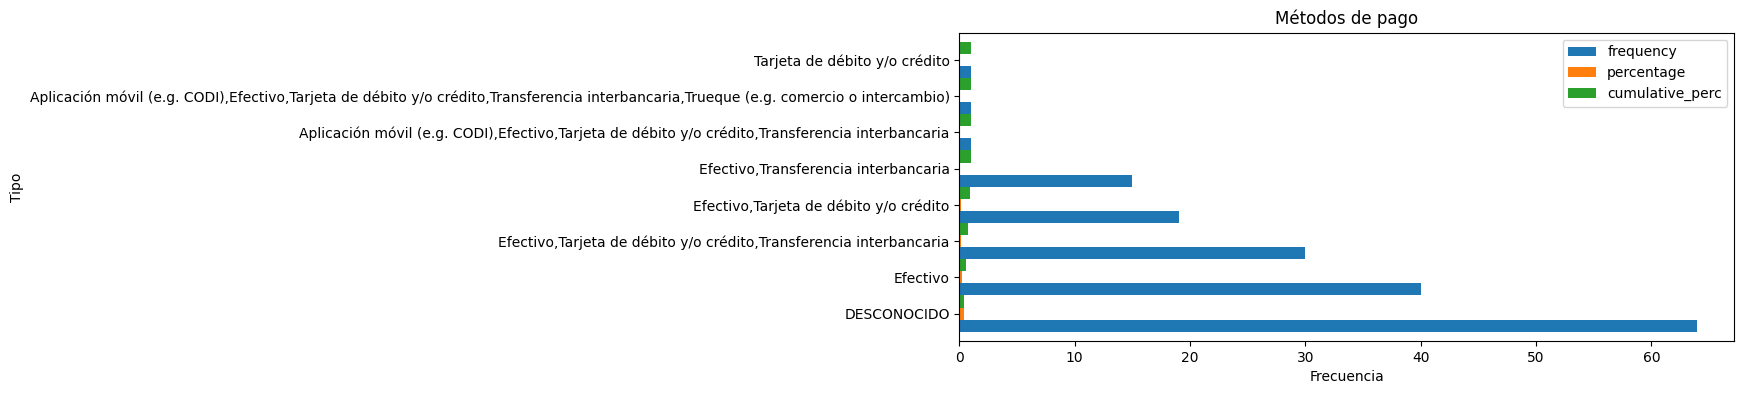

In [25]:
#189_payment_methods
payment_methods=freq_tbl(df['189_payment_methods'])
Filtro_payment_methods= payment_methods.set_index('189_payment_methods')
Filtro_payment_methods.plot(kind = 'barh', width=1, figsize=(10,4))
plt.title('Métodos de pago')
plt.xlabel('Frecuencia')
plt.ylabel('Tipo')

CONEXIÓN CON LOS CLIENTES

In [ ]:
#214_customer_relationship_tools
#69_why_not_services
#312_payment_of_utilities (PAGO DE SERVICIOS)

Text(0.5, 1.0, 'Herramientas de relación con los clientes')

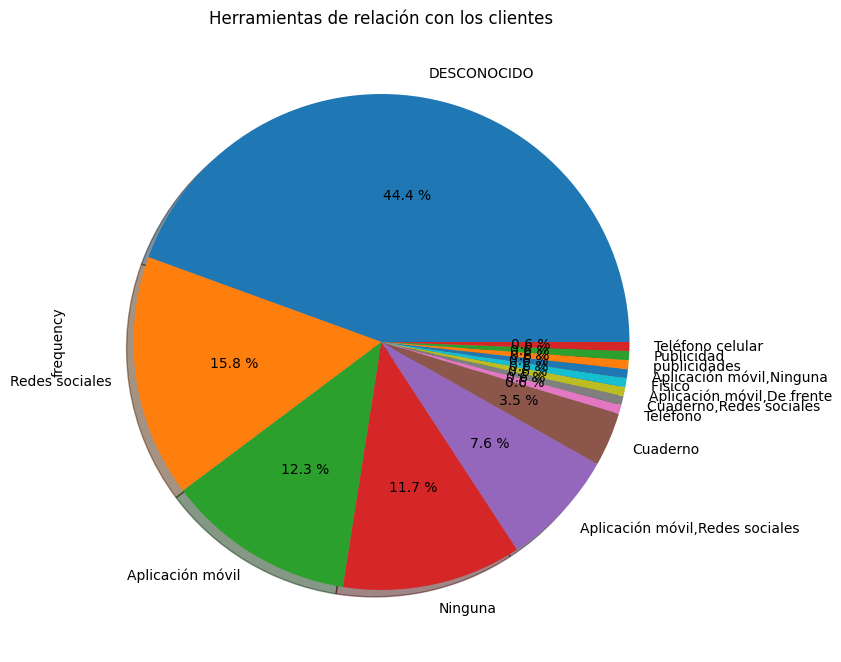

In [26]:
#214_customer_relationship_tools
customer_relationship_tools=freq_tbl(df['214_customer_relationship_tools'])
Filtro_customer_relationship_tools= customer_relationship_tools.set_index('214_customer_relationship_tools')
Filtro_customer_relationship_tools["frequency"].plot(kind='pie', figsize=(8,11), shadow=True, autopct="%0.1f %%")
plt.title('Herramientas de relación con los clientes')

Text(0, 0.5, 'Respuesta')

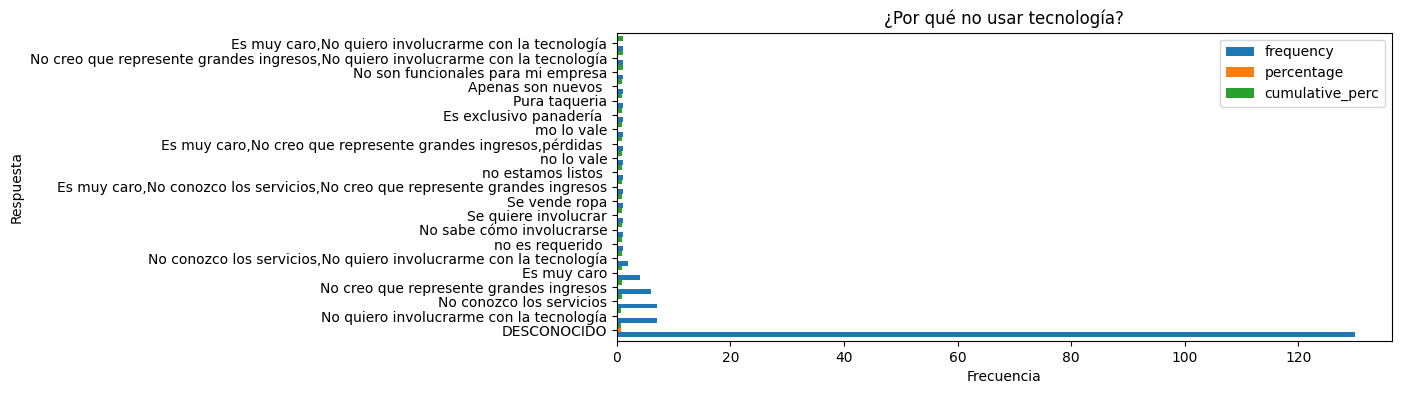

In [27]:
#69_why_not_services
why_not_services=freq_tbl(df['69_why_not_services'])
Filtro_why_not_services= why_not_services.set_index('69_why_not_services')
Filtro_why_not_services.plot(kind = 'barh', width=1, figsize=(10,4))
plt.title('¿Por qué no usar tecnología?')
plt.xlabel('Frecuencia')
plt.ylabel('Respuesta')

Text(0.5, 1.0, 'Pago de servicios tecnológicos')

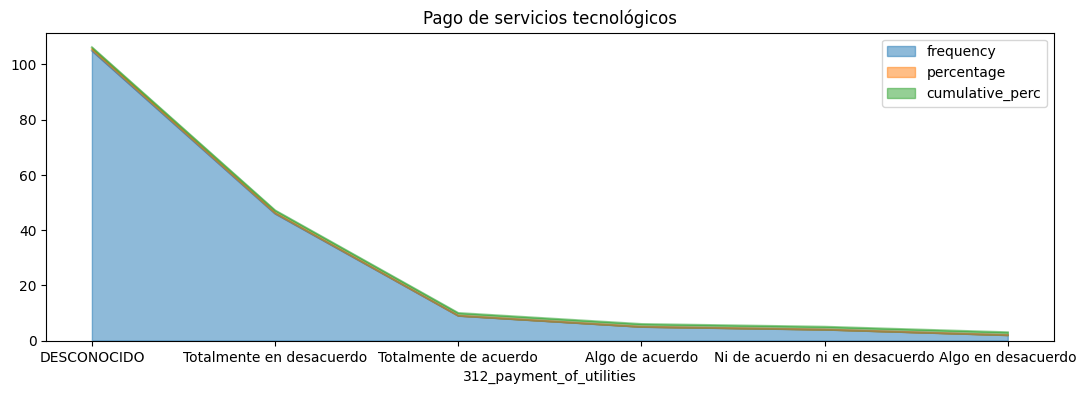

In [28]:
#312_payment_of_utilities
payment_of_utilities=freq_tbl(df['312_payment_of_utilities'])
Filtro_payment_of_utilities= payment_of_utilities.set_index('312_payment_of_utilities')
Filtro_payment_of_utilities.plot(kind='area', figsize=(13,4),alpha = 0.5)
plt.title('Pago de servicios tecnológicos')

PANDEMIA

In [ ]:
#279_changes_procurement_pandemic

Text(0.5, 1.0, 'Cambios de adquisición de producto en la pandemia')

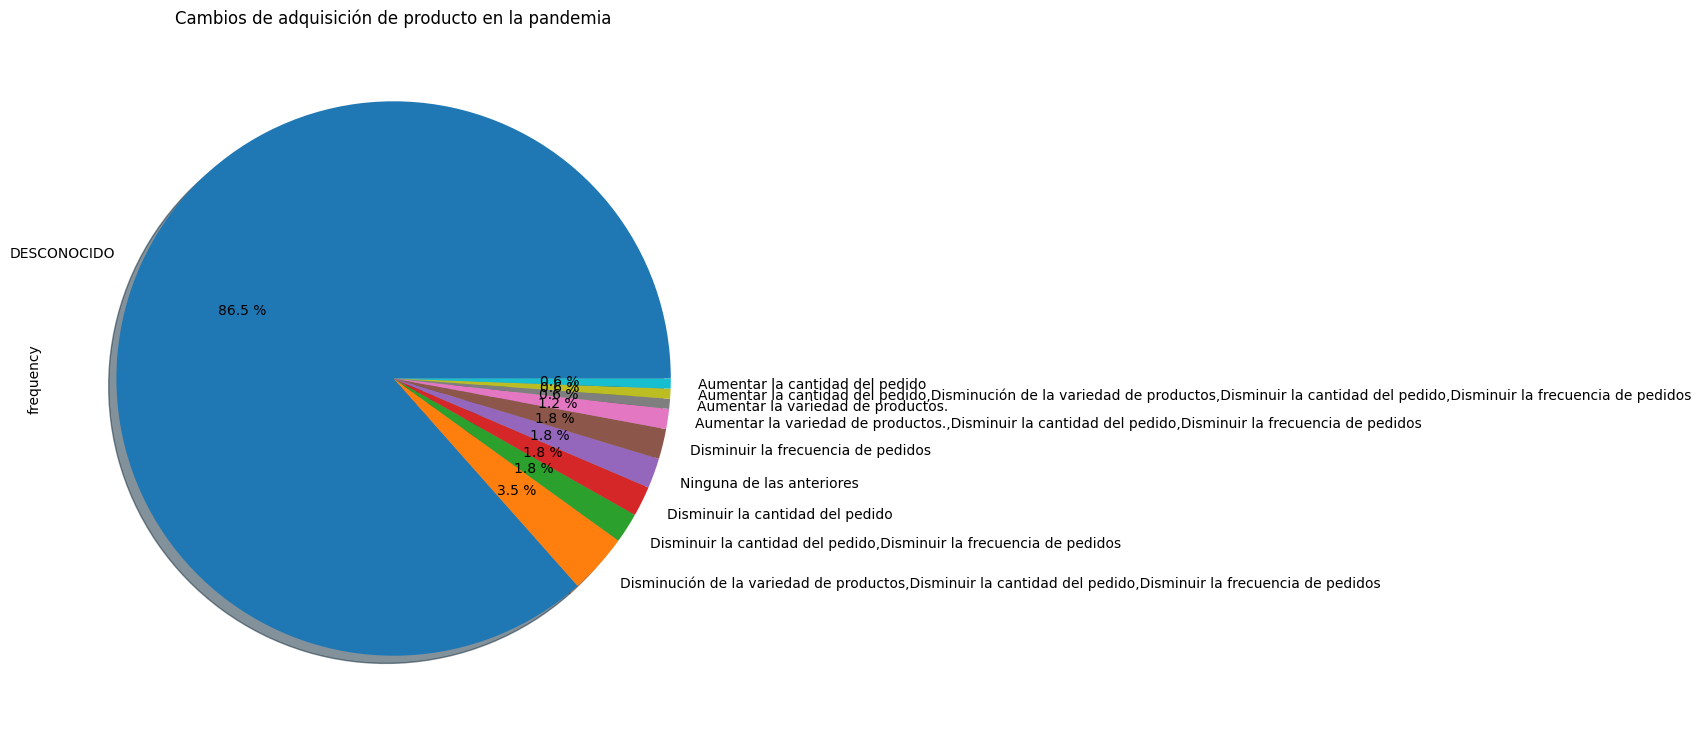

In [29]:
#279_changes_procurement_pandemic
changes_procurement_pandemic=freq_tbl(df['279_changes_procurement_pandemic'])
Filtro_changes_procurement_pandemic= changes_procurement_pandemic.set_index('279_changes_procurement_pandemic')
Filtro_changes_procurement_pandemic["frequency"].plot(kind='pie', figsize=(12,9), shadow=True, autopct="%0.1f %%")
plt.title('Cambios de adquisición de producto en la pandemia')